- clustering : concentrations of multivariate points 
- overdensities: clustering with density estimate
- unsupervised learning: no prioir knowledge about cluster properties ..etc 
- Kernel Density Estimation: given a bunch of datapoints , set each datapoint with its own kernel function so that you get a smoother estimate of the underlying density distribution (built from the histogram) 
- Nearest Neighbor density estimation: 
     - assumes a locally constant density field 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Example from astroMLbook on nearest density estimation

In [3]:
from astroML.density_estimation import KNeighborsDensity
X = np.random.normal(size=(1000,2)) #1000 points in 2D 
knd = KNeighborsDensity("bayesian",10) #selecting 10 nearest neighbors 
knd.fit(X)
dens = knd.eval(X)

In [4]:
# knd.fit?
# knd.eval?

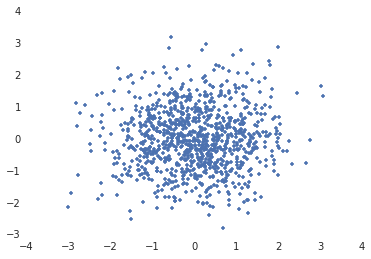

In [13]:
plt.plot(X[::,0],X[::,1],'.')

In [5]:
shape(X)

(1000, 2)

In [6]:
shape(dens)

(1000,)

In [1]:
import seaborn as sns

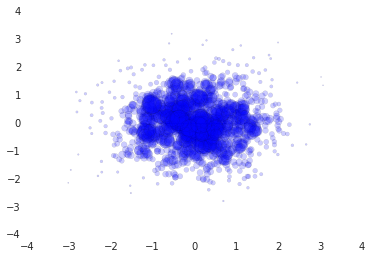

In [10]:
plt.scatter(X[::,0],X[::,1],dens,alpha=0.2)

(array([ 268.,  244.,  171.,  152.,   84.,   33.,   25.,    6.,   10.,    7.]),
 array([   0.6474838 ,   49.60181861,   98.55615342,  147.51048824,
         196.46482305,  245.41915786,  294.37349268,  343.32782749,
         392.2821623 ,  441.23649711,  490.19083193]),
 <a list of 10 Patch objects>)

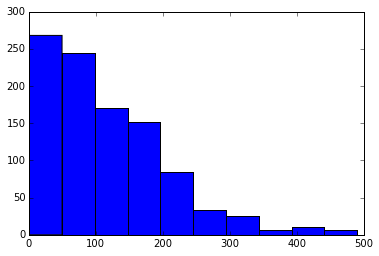

In [8]:
plt.hist(dens)

what if I select more neighbors 

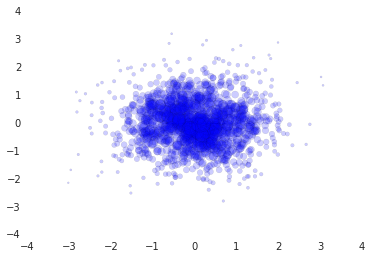

In [14]:
knd2 = KNeighborsDensity("bayesian",100) #selecting 100 nearest neighbors 
knd2.fit(X)
dens2 = knd2.eval(X)
plt.scatter(X[::,0],X[::,1],dens2,alpha=0.2)

Since the number of neighbors increase, the density distribution is less agglormerated, so more refined density estimattion

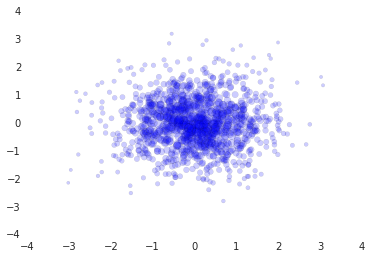

In [19]:
knd2 = KNeighborsDensity("bayesian",1000)
knd2.fit(X)
dens2 = knd2.eval(X)
plt.scatter(X[::,0],X[::,1],dens2,alpha=0.2)

### Clustering 

K means : 
- cluster into groups such that the residual quadrature is minimized $\Sigma ||x_i-\mu_k||^2$
- 1) find $\mu_k$ centroid 2) assign points to centroid 3) update centroid according to new assignment --> iterate 1~3 until no update is needed 
- assumption: each cluster contain approx same number of points and are spherical 

Another example from the book

In [36]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
clf.fit(X)
centers=clf.cluster_centers_
labels=clf.predict(X)

In [37]:
# KMeans?

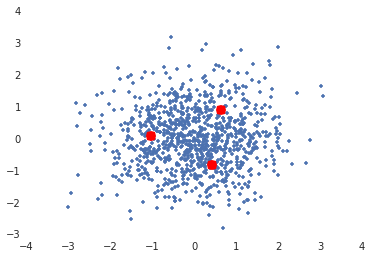

In [38]:
plt.plot(X[::,0],X[::,1],'.')
for i in centers:
    plt.plot(i[0],i[1],'o',markersize=10,color="red")

(array([  2,   5,   6,  14,  19,  23,  25,  27,  33,  37,  45,  46,  47,
         61,  63,  65,  66,  71,  72,  74,  78,  80,  81,  84,  86,  87,
         91,  98, 100, 102, 109, 110, 111, 112, 113, 119, 122, 123, 126,
        131, 137, 141, 144, 146, 147, 149, 152, 155, 160, 162, 168, 169,
        171, 173, 179, 180, 184, 185, 186, 189, 198, 199, 200, 204, 210,
        218, 225, 234, 239, 241, 242, 243, 245, 246, 247, 248, 252, 258,
        271, 275, 278, 284, 292, 296, 301, 302, 304, 309, 312, 317, 323,
        325, 331, 342, 344, 345, 347, 350, 351, 352, 357, 368, 372, 379,
        380, 381, 383, 386, 387, 394, 395, 400, 401, 402, 404, 405, 406,
        407, 413, 417, 419, 420, 422, 423, 424, 426, 431, 434, 438, 439,
        447, 449, 450, 453, 458, 464, 465, 466, 471, 473, 474, 478, 482,
        487, 495, 497, 500, 504, 505, 511, 512, 514, 522, 526, 529, 530,
        535, 536, 537, 538, 539, 552, 560, 565, 568, 576, 577, 580, 583,
        584, 585, 587, 588, 600, 603, 605, 608, 610

In [48]:
X

array([[ 0.20935714, -0.18189683],
       [-1.3033927 , -0.67012827],
       [ 1.16686638,  0.48923276],
       ..., 
       [ 1.29844695, -1.01432072],
       [-1.13171501,  0.90813166],
       [ 1.31513482, -0.22201757]])

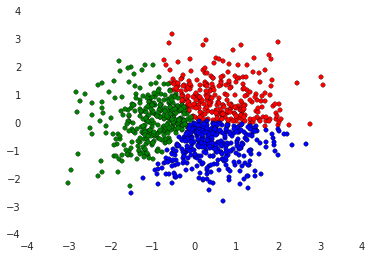

In [53]:
color = ["red","green","blue"]
num_clusters=3
for i in range(num_clusters):
    group  = np.where(labels==i)
    plt.scatter(X[group,0], X[group,1],c=color[i])

what if I increase the number of clusters 

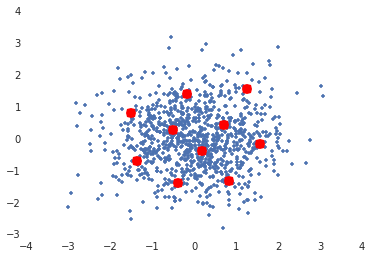

In [54]:
clf = KMeans(n_clusters=10)
clf.fit(X)
centers=clf.cluster_centers_
labels=clf.predict(X)
plt.plot(X[::,0],X[::,1],'.')
for i in centers:
    plt.plot(i[0],i[1],'o',markersize=10,color="red")

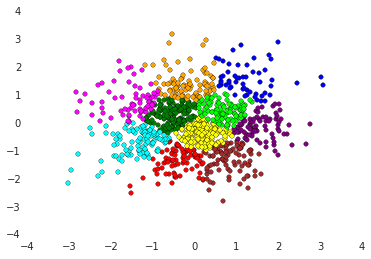

In [55]:
color = ["red","green","blue","cyan","purple","orange","magenta","brown","yellow","lime"]
num_clusters=10
for i in range(num_clusters):
    group  = np.where(labels==i)
    plt.scatter(X[group,0], X[group,1],c=color[i])